In [1]:
from spmf import Spmf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np


In [2]:
df = pd.read_csv('classla_medjukorak.csv', sep='\t')
df_sorted = df.sort_values(by='Autor')
df_sorted['Rbr'] = range(1, len(df_sorted) + 1)
df_sorted = df_sorted[['Rbr','Autor', 'Procesiran tekst']]
df_sorted['Tekst'] = df_sorted['Procesiran tekst'].apply(lambda x: ' '.join(eval(x)))
df=df_sorted.drop(columns=['Autor', 'Procesiran tekst'])
df.to_csv('sorted_file.txt', index=False, header=False, sep='\t' )

In [3]:
spmf = Spmf("TextClusterer", input_filename="sorted_file.txt",
            output_filename="clusters.txt", arguments=[True,False])
spmf.run()


>/Users/jelenalazovic/Desktop/AutorshipAttribution/spmf.jar
========== Text Clusterer - STATS ============
 Total time ~: 45034 ms
 Max memory:0.0 mb 



In [4]:
df_clusters = pd.read_csv('clusters.txt', sep='\t')
df_unique = df_clusters.drop_duplicates(subset='RecordId')
df_unique=df_unique.sort_values(by='RecordId')
df_unique['Clusternum']=df_unique['Clusternum']+1
df_unique.to_csv('cleaned_clusters.txt', sep='\t', index=False)


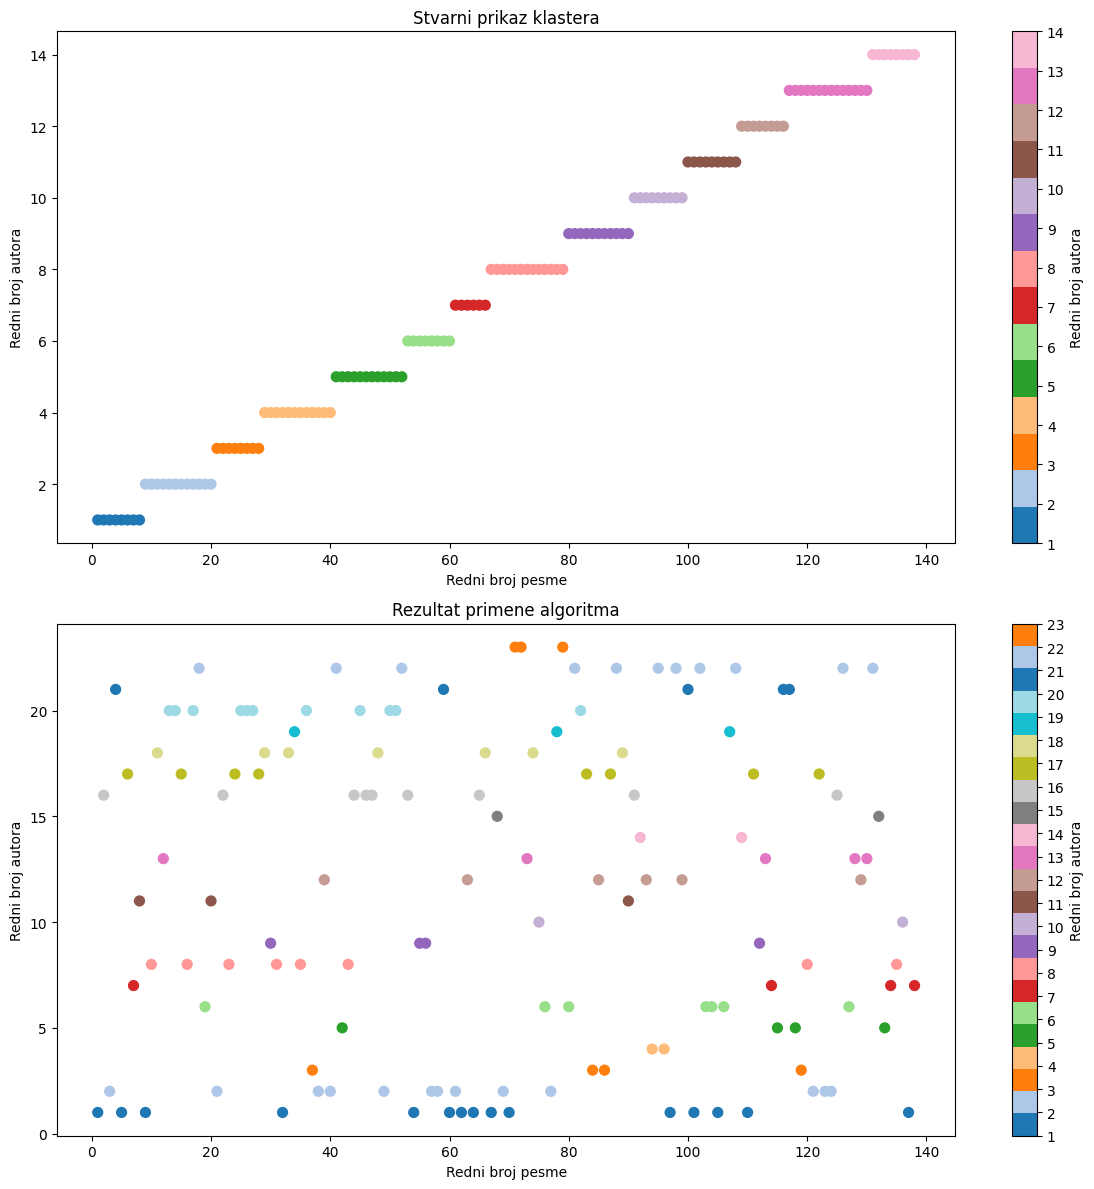

In [5]:
num_clusters = len(df_sorted['Autor'].unique())
colors = plt.cm.tab20.colors[:num_clusters]
cmap = ListedColormap(colors)

plt.figure(figsize=(12, 12))
plt.subplot(211)
plt.scatter(df_sorted['Rbr'], df_sorted['Autor'], c=df_sorted['Autor'], cmap=cmap, marker='o', s=50)
plt.xlabel('Redni broj pesme')
plt.ylabel('Redni broj autora')
plt.title('Stvarni prikaz klastera')
plt.colorbar(label='Redni broj autora',ticks=np.arange(1, num_clusters + 1))

num_clusters2 = len(df_unique['Clusternum'].unique())
colors2 = plt.cm.tab20.colors[:num_clusters2]

# Extend the colormap by repeating some colors
extended_colors2 = colors2 * (num_clusters2 // len(colors2)) + colors2[:num_clusters2 % len(colors2)]
cmap2 = ListedColormap(extended_colors2)


plt.subplot(212)
plt.scatter(df_unique['RecordId'], df_unique['Clusternum'], c=df_unique['Clusternum'], cmap=cmap2, marker='o', s=50)
plt.xlabel('Redni broj pesme')
plt.ylabel('Redni broj autora')
plt.title('Rezultat primene algoritma')
plt.colorbar(label='Redni broj autora', ticks=np.arange(1, num_clusters2 + 1))

plt.tight_layout()
plt.show()



In [6]:
from sklearn.metrics import accuracy_score


In [7]:
accuracy = accuracy_score(df_sorted['Rbr'], df_unique['Clusternum'])

In [8]:
accuracy

0.014492753623188406

In [9]:
df = pd.read_csv('classla_medjukorak.csv', sep='\t')
df_bayes = df.sort_values(by='Autor')
df_bayes['Tekst'] = df_bayes['Procesiran tekst'].apply(lambda x: ' '.join(eval(x)))
df_bayes.drop(columns='Procesiran tekst')


,Autor,Tekst
0,1,padati braća plinuti krv ostaviti selo nek gor...
1,1,mudrac prinositi dar Smirna zlato car judejski...
2,1,mnogi dosad zapitkivati srce oboleti sad nek z...
3,1,stena koji zloba moriti svetski čudo pokoriti ...
4,1,kroz ponoć nem gust granje videti zvezda tih t...
...,...,...
107,14,nitko samo kuća srce vrlo jako zbog napolju ma...
109,14,ljubav tako silan tako drhtav tako očajan tako...
110,14,Narandža stol haljina pod postelja blag poklon...
81,14,sipati kafa šolja doliti mleko staviti šećer b...


In [10]:
from sklearn.model_selection import train_test_split

X = df_bayes['Tekst']
y = df_bayes['Autor']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

df_train = pd.DataFrame({'Autor': y_train, 'Tekst': X_train})
df_test = pd.DataFrame({'Autor': y_test, 'Tekst': X_test})



In [11]:
import os

unique_authors = df_train['Autor'].unique()

training_dir = "Trening"
os.makedirs(training_dir, exist_ok=True)

for author_id in unique_authors:
    author_dir = os.path.join(training_dir, f"{author_id}")
    os.makedirs(author_dir, exist_ok=True)

for index, row in df_train.iterrows():
    author_id = row['Autor']
    text = row['Tekst']
    author_dir = os.path.join(training_dir, f"{author_id}")
    file_name = f"{author_dir}/{index}.txt"
    with open(file_name, 'w') as f:
        f.write(text)

test_dir = "Testiranje"
os.makedirs(test_dir, exist_ok=True)

for index, row in df_test.iterrows():
    text = row['Tekst']
    file_name = f"{test_dir}/{index}.txt"
    with open(file_name, 'w') as f:
        f.write(text)
